In [53]:
import numpy as np 
import pandas as pd

In [54]:
pip install plotly_express 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly_express as px

In [58]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [59]:
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [64]:
import boto3

In [65]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('pradeep2022')

In [66]:
for bucket in s3.buckets.all():
    print(bucket)

s3.Bucket(name='nava-demo-bucket')
s3.Bucket(name='pradeep2022')


In [11]:
# s3://pradeep2022/train_1.csv

In [67]:
# Loading datasets from S3 Bucket:

data = pd.read_csv("s3://pradeep2022/train_1.csv")
test = pd.read_csv("s3://pradeep2022/test_2.csv")

In [68]:
## Getting the data

data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
# There are 1460 rows and 81 columns in this dataset:
## Basic Checks

data.head()  ## getting first five columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
data.tail() ## getting last five columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [71]:
data.describe() ## getting the descriptive satistical  details 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
data.info() ## getting the information from the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
## checking if there is any duplicate data

data.duplicated().sum()



0

In [75]:
## Analysing if there is any null values

pd.options.display.max_rows=None ## shows all the rows
data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# There are 19 columns with null values.

In [77]:
#pd.reset_option('max_columns')
pd.reset_option('max_rows')


# Handling the missing values and Feature selection:


In [78]:
## Handling missing values for LotFrontage:

data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

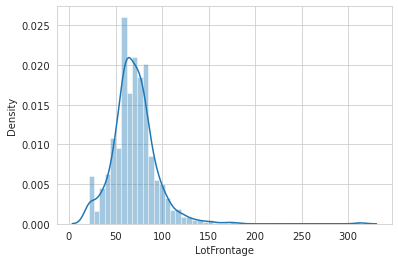

In [79]:
## distribution plot for LotFrontage
 
sns.distplot(data.LotFrontage)
plt.show()


In [80]:
data['LotFrontage'].mean()  ## getting the mean

70.04995836802665

In [81]:
## Checking the percentage of missing values for LotFrontage

print('The Percentage of data missing in LotFrontage is ',data.LotFrontage.isnull().sum()/len(data)*100)


The Percentage of data missing in LotFrontage is  17.73972602739726


In [82]:
data.loc[data['LotFrontage'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [83]:
## Replacing the nan values with mean for LotFrontage

data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=70.0


# # Handling the missing values for Alley,PoolQC,Fence,MiscFeature:

In [84]:
## Percentage of missing values in Alley,PoolQC,Fence,MiscFeature
 
d1=data[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

More than 80% of the data are missing in Alley,PoolQC,Fence,MiscFeature.

In [85]:
## Removing the Features:

data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# Handling the missing values for BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2


In [86]:
## Percentage of missing values

d2=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
b


BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [87]:
## Replacing the missing values with 'NA'

data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')

# Replacing missing values for MasVnrType

In [88]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [89]:
## Replacing the missing values with mode

data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='None'


# Replacing missing values for MasVnrArea



<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

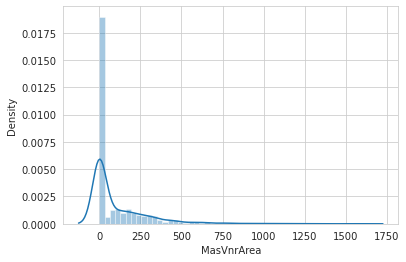

In [90]:
sns.distplot(data.MasVnrArea)


In [91]:
## Finding the median

data['MasVnrArea'].median()


0.0

In [93]:
## Replacing the missing value by median:

data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=0.0

# Handling missing values for GarageType,GarageFinish,GarageQual,GarageCond


In [94]:
## Percentage of missing values
d3=data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
c

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [95]:
## Replacing the missing values for GarageType,GarageFinish,GarageQual,GarageCond  by NA

data['GarageType']=data['GarageType'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageCond']=data['GarageCond'].fillna('NA')

# Handling the missing value for GarageYrBlt:

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

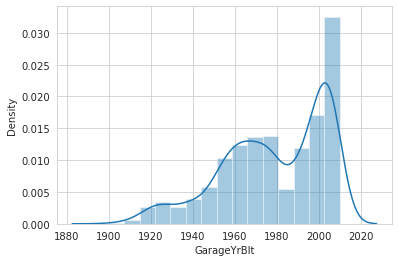

In [96]:
sns.distplot(data.GarageYrBlt)

In [97]:
data.GarageYrBlt.median()

1980.0

In [98]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1980.0

In [99]:
## Handling the missing value for Electrical:

data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [100]:
## Replacing the null values with mode:


data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

# Handling the missing values for FireplaceQu

In [101]:
data.FireplaceQu.value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [103]:
## Replacing the missing values with NA:

data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [104]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

# There is no null values now.We have cleared all the null values.

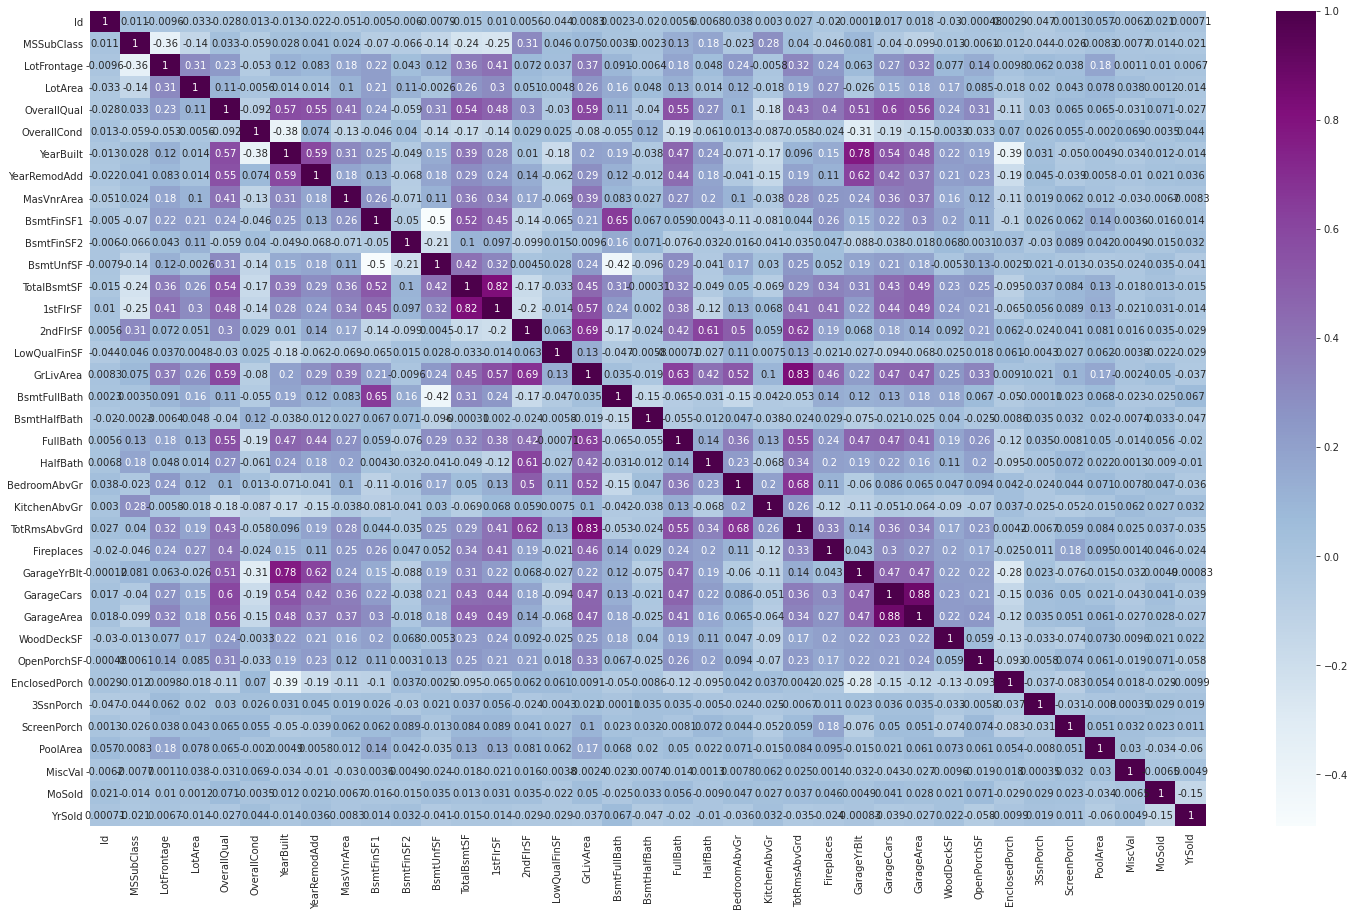

In [105]:
plt.figure(figsize=(25,15))
sns.heatmap(data.drop('SalePrice',axis=1).corr(),cmap="BuPu",annot=True)
plt.show()


# Exploratory Data Analysis

# Univarient Analysis:

In [106]:
## Getting the features with object datatype
dtype_objects = list(columns for columns in data.select_dtypes([object]).columns)

In [107]:
dtype_objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [108]:
len(dtype_objects)

39

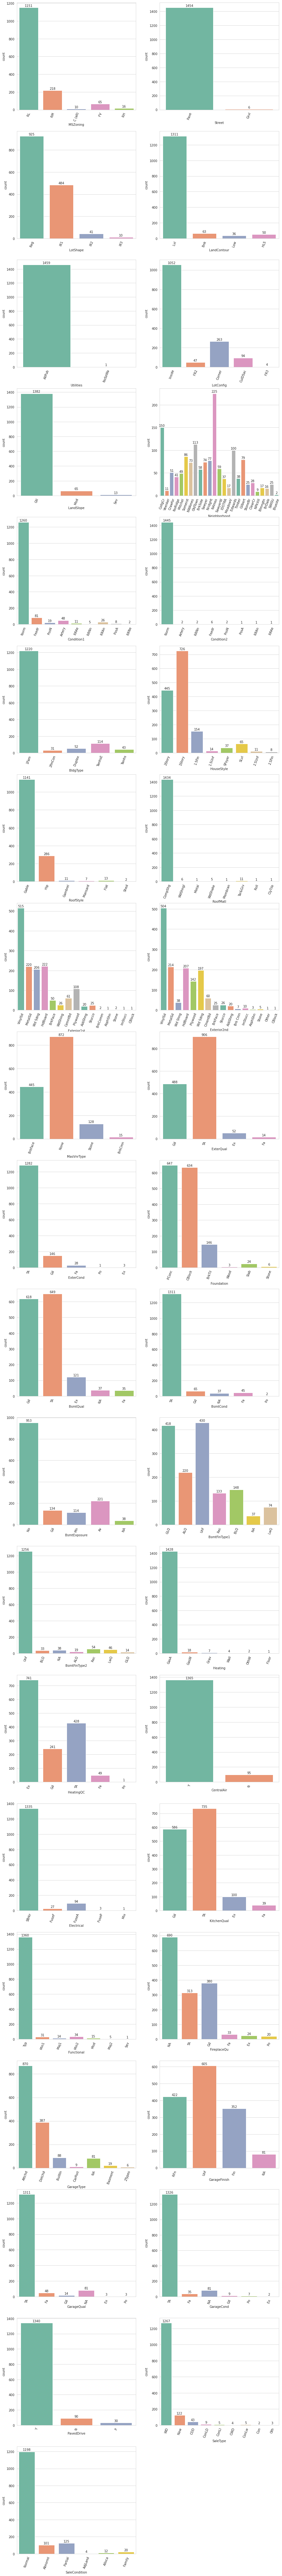

In [109]:
## countplot for datatype with objects

plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=data[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

Count plot for the datatype object has been plotted


In [110]:
## Getting the features with float datatype

dtype_float =list(columns for columns in data.select_dtypes([float]).columns)


In [111]:
dtype_float

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

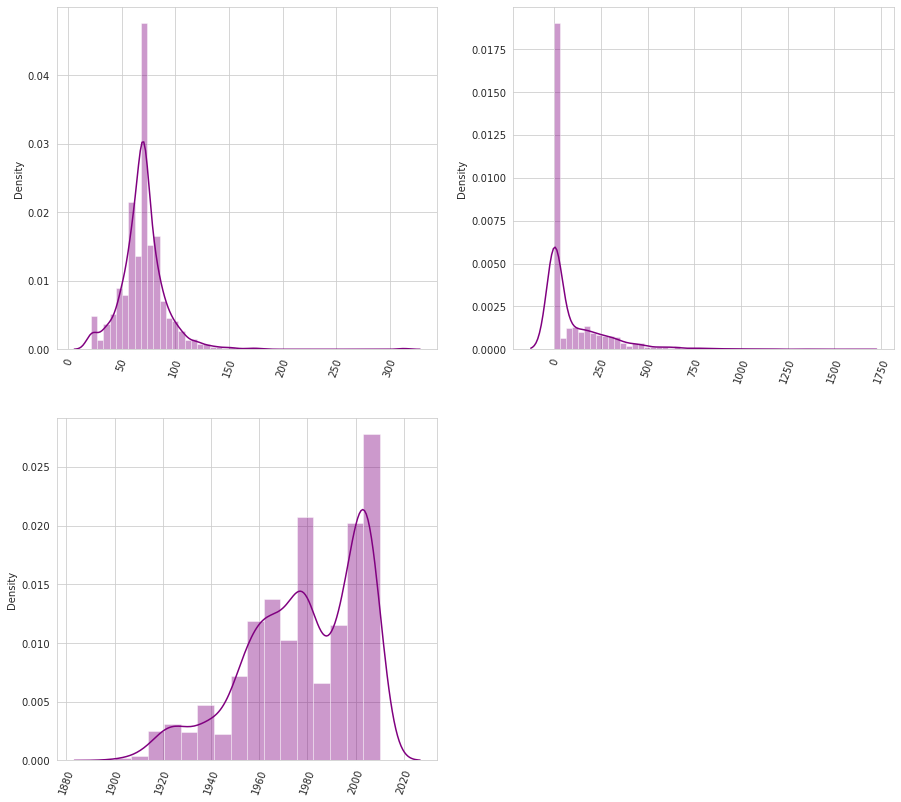

In [112]:
## Distribution plot 

plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=data[a],color='purple')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show() 

From the graph LotFrontage gives normal distribution but MasVnrArea and GarageYrBlt is skewed.

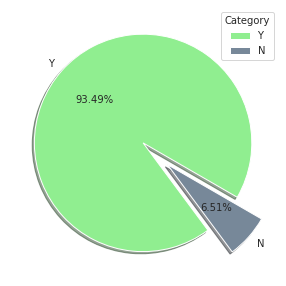

In [113]:
## Pie plot for CentralAir

plt.figure(figsize=(5,5))
labels=['Y','N']
size=data['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

From the graph 93.49% houses has CentralAir and 6.51% houses has no CentralAir.

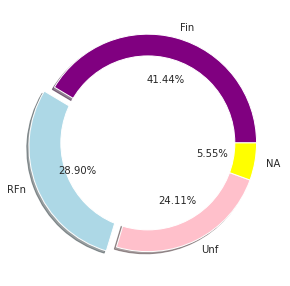

In [114]:
## Donut chart for GarageFinish:


plt.figure(figsize=(5,5))
labels=['Fin','RFn','Unf','NA']
size=data['GarageFinish'].value_counts()
colors=['purple','lightblue','pink','yellow']
explode=[0,0.1,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()


From the graph for 41.44% of the houses the interior finish of the garage is finished.


# Bivarient and Multivarient Analysis

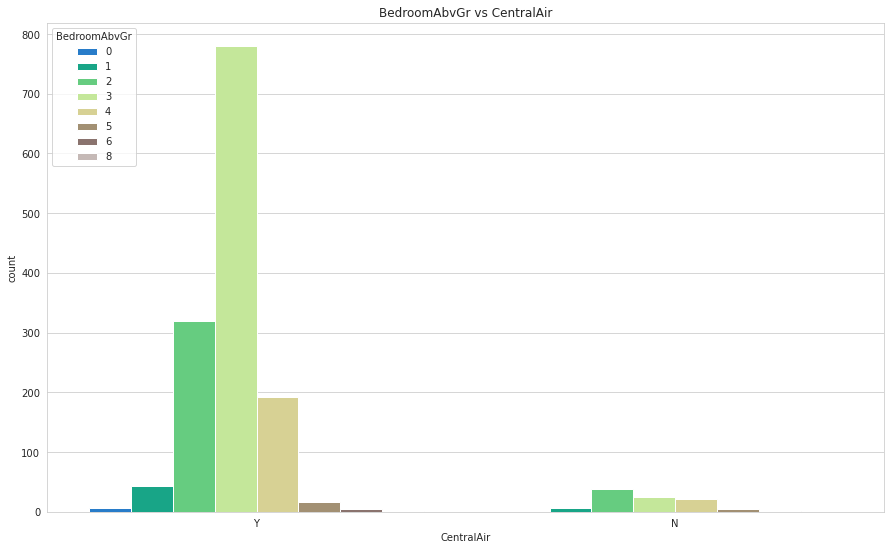

In [115]:
## Countplot for CentralAir and BedroomAbvGr

plt.figure(figsize=(15,9))
sns.countplot(x='CentralAir',hue='BedroomAbvGr',palette='terrain',data=data).set(title="BedroomAbvGr vs CentralAir")
plt.show()

The houses with 3 bedrooms has more central air conditioning than others.

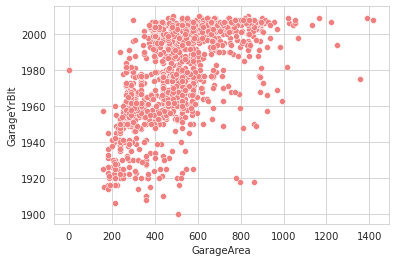

In [116]:
## Scatter plot for GarageArea and GarageYrBlt

sns.scatterplot(x='GarageArea',y='GarageYrBlt',data=data,color='lightcoral')
plt.show()

We can see there are some outliers present while comparing garage area and garage year built


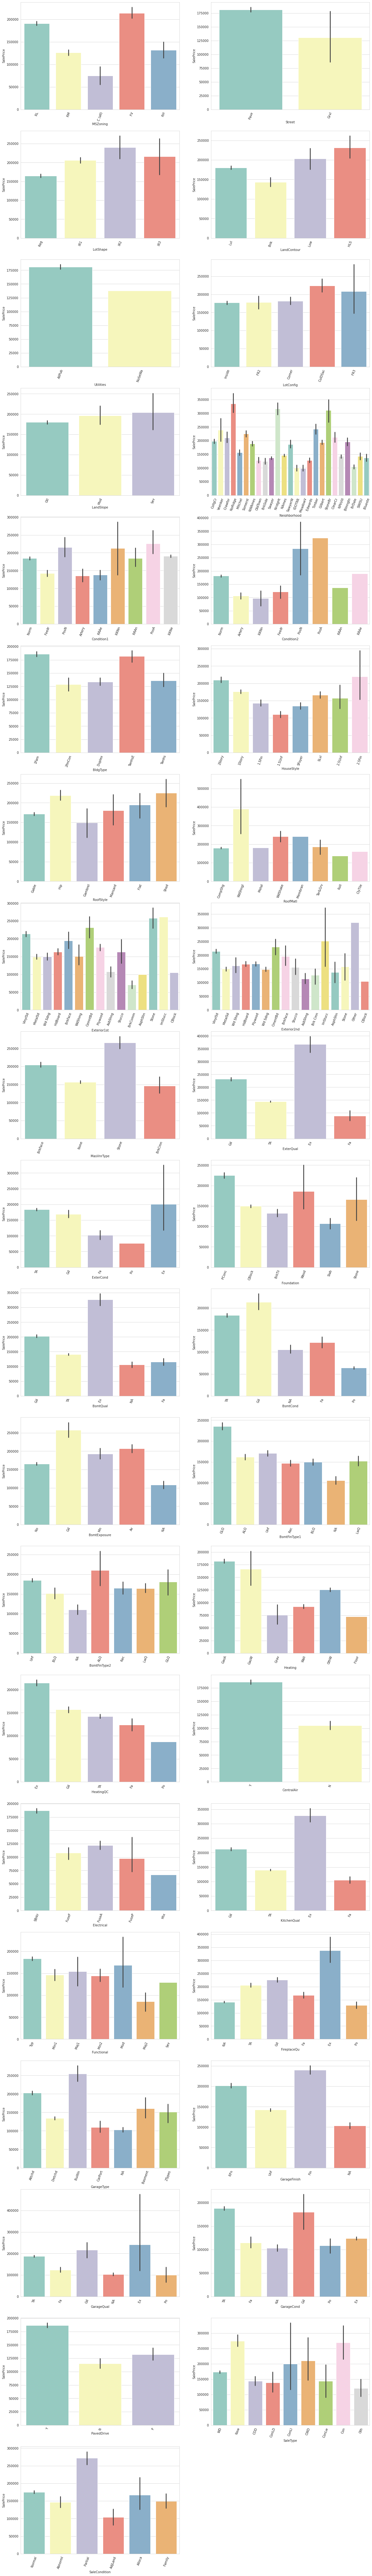

In [117]:
## barplot for saleprice and the data type with objects

plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

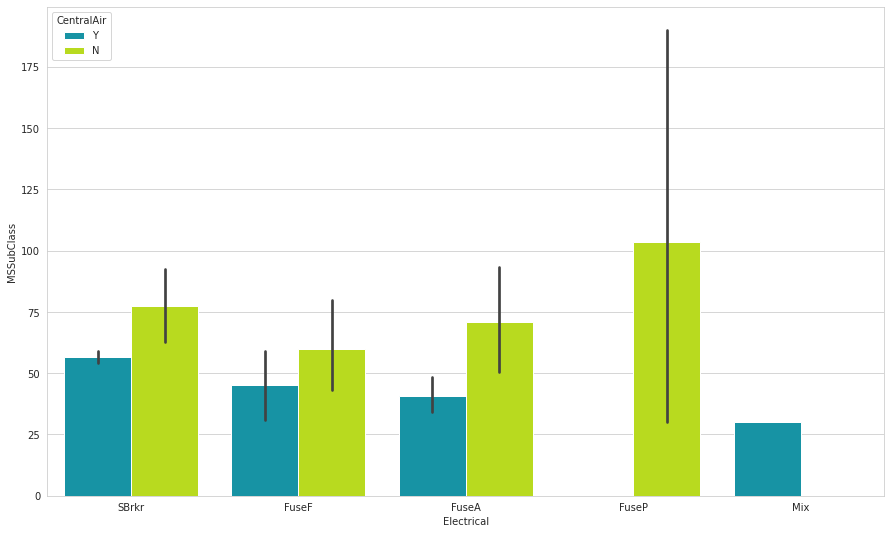

In [118]:
## bar plot for Electrical,MSSubClass,CentralAir

plt.figure(figsize=(15,9))
splot=sns.barplot(x='Electrical',y='MSSubClass',hue='CentralAir',palette='nipy_spectral',data=data)
plt.show()


Building with 2-STORY 1946 & NEWER and Standard Circuit Breakers & Romex use more central air conditioning than others.


In [119]:
## Getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

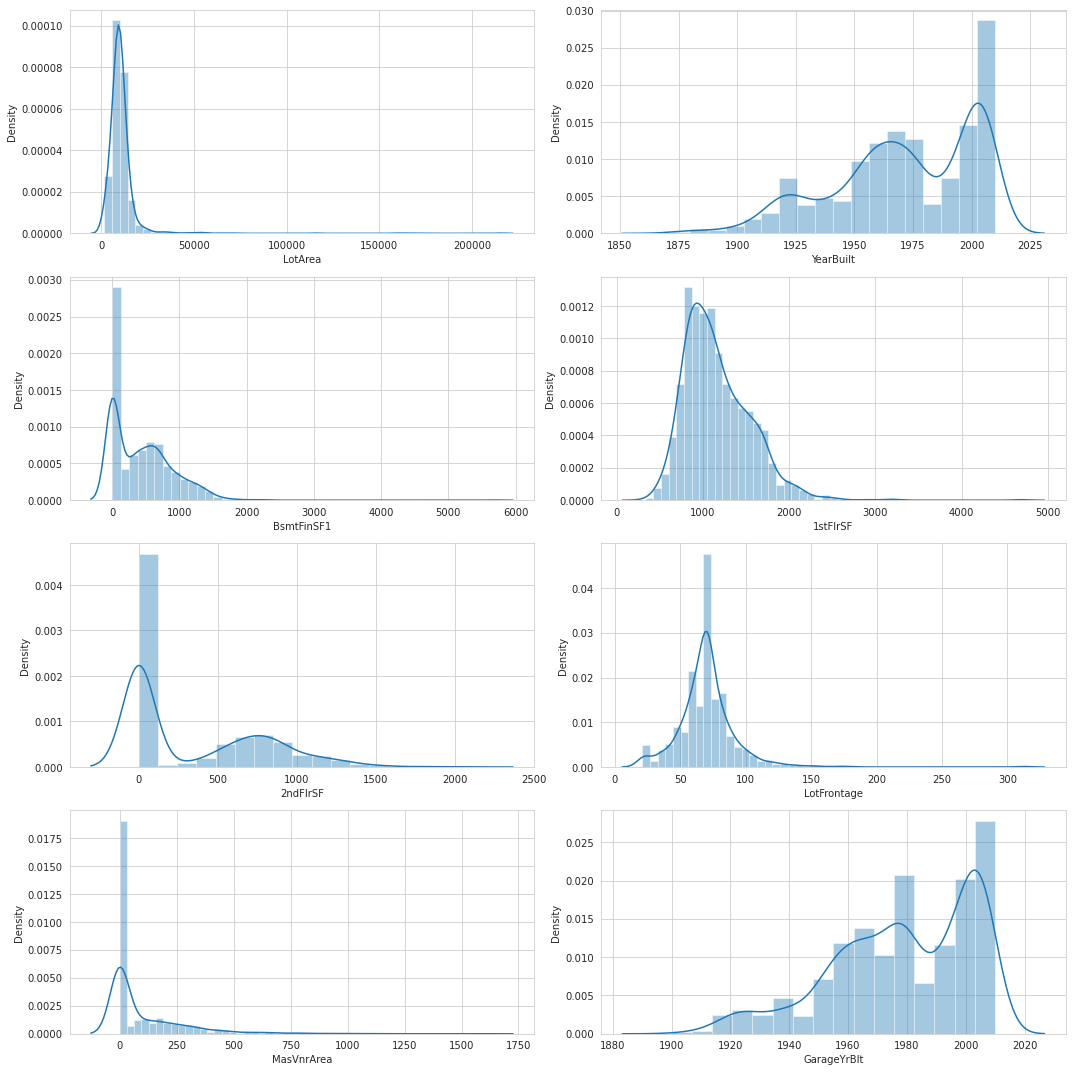

In [120]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()

# Finding the outliers

In [121]:
## getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]


In [122]:
box

,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.0,196.0,2003.0
1,9600,1976,978,1262,0,80.0,0.0,1976.0
2,11250,2001,486,920,866,68.0,162.0,2001.0
3,9550,1915,216,961,756,60.0,0.0,1998.0
4,14260,2000,655,1145,1053,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...
1455,7917,1999,0,953,694,62.0,0.0,1999.0
1456,13175,1978,790,2073,0,85.0,119.0,1978.0
1457,9042,1941,275,1188,1152,66.0,0.0,1941.0
1458,9717,1950,49,1078,0,68.0,0.0,1950.0


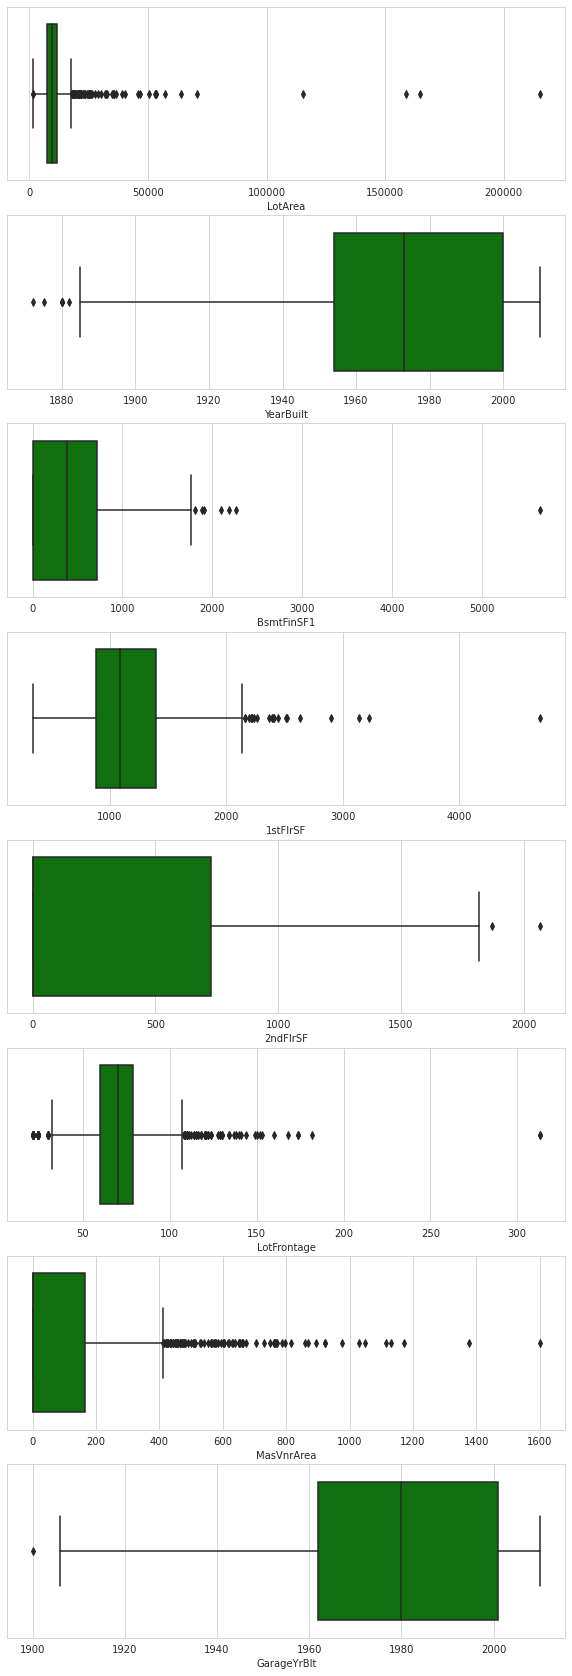

In [123]:
## boxplot to find the outliers

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(data[c],color='green')
    plotnumber=plotnumber + 1 
plt.show()

# Handling the skewness:

In [124]:
from scipy.stats import skew

numerical_features = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# checking the head of skewness dataset
skewness


,skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [125]:
##applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    data[features] += 1
    data[features] = boxcox1p(data[features], lamda)
data[skewed_features] = np.log1p(data[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')


There are 38 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


# Changing categorical data to numerical data:

In [126]:
#getting all the categorical feature

data_object = data.select_dtypes(include = "object").columns
print (data_object)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [127]:
#Label Encoding to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    data[features] = le.fit_transform(data[features].astype(str))

print (data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# Feature Scaling

In [128]:
## Scaling the features
## Spliting the variables

x=data.drop(['Id','SalePrice'],axis=1) ## all the features
y=data['SalePrice']  ## target variable

In [129]:
#using minmax scaler to scale all the datas

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)


# Model Creation

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=0)

In [132]:
x_train.shape  ## number of rows and columns  given for training 


(1168, 75)

In [133]:
x_test.shape  ## number of row and columns given for testing


(292, 75)

# Model Evaluation

# Linear Regression

In [134]:
## importing the library

from sklearn.linear_model import LinearRegression

In [135]:
LR=LinearRegression()
LR.fit(x_train,y_train)  ## fitting the training data

x_test_pred_LR=LR.predict(x_test)  ## predicted x test


In [136]:
x_test_pred_LR

array([3.56897725, 3.55147017, 3.48312596, 3.59309125, 3.44246724,
       3.43953742, 3.62147406, 3.51073026, 3.73887512, 3.54417511,
       3.57147223, 3.44675168, 3.60910685, 3.48533136, 3.5052377 ,
       3.51417751, 3.608123  , 3.4894463 , 3.51240835, 3.54150706,
       3.50677579, 3.5299202 , 3.44384625, 3.53643732, 3.57754658,
       3.57146672, 3.54539604, 3.41824491, 3.67620012, 3.47399716,
       3.5173215 , 3.60075491, 3.5280306 , 3.64214582, 3.6574771 ,
       3.58138928, 3.64814579, 3.4899916 , 3.59972737, 3.66067605,
       3.60824658, 3.4998351 , 3.58565824, 3.64968961, 3.66924486,
       3.52068938, 3.38025539, 3.49069776, 3.56092809, 3.44788387,
       3.69727556, 3.52727339, 3.55006325, 3.42143794, 3.61955837,
       3.46587025, 3.49081833, 3.6018098 , 3.5159465 , 3.45559172,
       3.51589214, 3.49815392, 3.51100109, 3.5366745 , 3.59483603,
       3.54515097, 3.50901047, 3.58613986, 3.49589468, 3.5897566 ,
       3.57998057, 3.53641453, 3.39194262, 3.61742429, 3.42772

In [137]:
y_test ## tested y

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [138]:
x_train_pred_LR=LR.predict(x_train) ##predicted x train

x_train_pred_LR

array([3.66490891, 3.45100289, 3.51392298, ..., 3.51449707, 3.57409817,
       3.58299865])

In [139]:
y_train  ## trained y

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [140]:
print('Linear Regression trainind score is',LR.score(x_train,y_train))

Linear Regression trainind score is 0.9112461405416293


In [141]:
print('Linear Regression testing score is',LR.score(x_test,y_test))

Linear Regression testing score is 0.8048949881798663


# Evaluation Metrics for Linear Regression

In [142]:
from sklearn.metrics import r2_score

In [143]:
train_score=r2_score(y_train,x_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9112461405416293


In [144]:
test_score=r2_score(y_test,x_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.8048949881798663


Training score is more than testing score so the model is underfitting.


# Random Forest Regressor

In [145]:
## Importing the library

from sklearn.ensemble import RandomForestRegressor

In [146]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train) ## fitting the data

x_test_pred_RF=RF.predict(x_test)  ## predicted x test


In [147]:
x_test_pred_RF

array([3.59021399, 3.52182693, 3.47644206, 3.60150908, 3.4423815 ,
       3.46610632, 3.62351569, 3.48978682, 3.73003348, 3.53941518,
       3.57783685, 3.52208986, 3.59876971, 3.49420717, 3.49608209,
       3.528303  , 3.6016473 , 3.48591594, 3.52448098, 3.57528805,
       3.50571282, 3.52189272, 3.46951093, 3.55048085, 3.56050905,
       3.58771551, 3.55290907, 3.42832128, 3.66045535, 3.4892461 ,
       3.51366777, 3.57776261, 3.51903975, 3.6480061 , 3.664616  ,
       3.56404301, 3.6390941 , 3.49792479, 3.61029287, 3.64759696,
       3.58018012, 3.51054793, 3.56664128, 3.65253838, 3.6629021 ,
       3.51973784, 3.5014964 , 3.49868122, 3.55208775, 3.45957683,
       3.68462846, 3.52489229, 3.54930105, 3.44133902, 3.6127953 ,
       3.47772365, 3.51095128, 3.61497216, 3.51572374, 3.47308845,
       3.52324752, 3.51116315, 3.5261655 , 3.53870345, 3.57373973,
       3.5432671 , 3.49386524, 3.59448668, 3.50183275, 3.56985694,
       3.56363922, 3.48772338, 3.4224686 , 3.60192081, 3.44613

In [148]:
y_test   ## y test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [149]:
x_train_pred_RF=LR.predict(x_train)  ## predicted x train
x_train_pred_RF

array([3.66490891, 3.45100289, 3.51392298, ..., 3.51449707, 3.57409817,
       3.58299865])

In [150]:
y_train  ## y train

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

# Random Forest Regressor Score

In [151]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))


Training score for Random Forest Regressor is 0.9813627869361151


In [152]:
print('Testing score for Random Forest Regressor is',RF.score(x_test,y_test))


Testing score for Random Forest Regressor is 0.877855239932591


Training score is more than Testing score,so the Random Forest Regressor model is underfitting.So we can do hyper parametric tuning.


# Hyper parametric Tuning -- Random Forest Regressor

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
random_grid = {'n_estimators': [100,200,300,400,500,600],  ## no. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], ## maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], ## minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], ## Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  ##  Method of selecting samples for training each tree

In [155]:
hyper_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [156]:
hyper_tuning.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [157]:
hyper_tuning.best_params_  ## getting the best parameters


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [158]:
RF_hyper_tuning=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf= 1,max_features='sqrt',max_depth=30,bootstrap= False)  ## implementing the best parameters

In [159]:
RF_hyper_tuning.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=600)

In [160]:
RF_hyper_pred_test=RF_hyper_tuning.predict(x_test) ## predicted hyperparametric tuning x test

RF_hyper_pred_test

array([3.59133967, 3.51636354, 3.48725042, 3.58458474, 3.4498654 ,
       3.47372798, 3.61542845, 3.50267788, 3.7369991 , 3.53556879,
       3.58273032, 3.52775234, 3.60381756, 3.50252146, 3.49682656,
       3.5232784 , 3.60049411, 3.46790217, 3.51720474, 3.54784116,
       3.49871296, 3.52616311, 3.47802062, 3.54889644, 3.57131374,
       3.58162732, 3.55609944, 3.42401847, 3.66433359, 3.48437249,
       3.51748591, 3.58139192, 3.52114223, 3.6466712 , 3.65932954,
       3.56555019, 3.63546558, 3.50220735, 3.60763613, 3.65347771,
       3.58626838, 3.5048073 , 3.563449  , 3.65488044, 3.66475271,
       3.52386335, 3.5009727 , 3.5054204 , 3.54998391, 3.47194335,
       3.68260612, 3.52538022, 3.55244143, 3.42826502, 3.61113527,
       3.48187385, 3.50222738, 3.60852995, 3.5157726 , 3.47281849,
       3.52615198, 3.50968929, 3.52543193, 3.53808856, 3.59045494,
       3.53749308, 3.50212824, 3.59535212, 3.50769321, 3.57817189,
       3.56384673, 3.49767754, 3.43960312, 3.59822421, 3.44229

In [161]:
y_test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [162]:
RF_hyper_pred_train=RF_hyper_tuning.predict(x_train)  ## predicted hyper parametric tuning x train

RF_hyper_pred_train

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

# Score for Random Forest Regressor Hyper Parametric Tuning

In [163]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_train,y_train))


Training score for Random Forest Regressor Hyper Parametric Tuning is  0.9999999999701277


In [164]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_test,y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.8830405423543817


# Decision Tree Regressor

In [165]:
## Importing the library

from sklearn.tree import DecisionTreeRegressor

In [166]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [167]:
x_test_pred_DT=DT.predict(x_test) ## predicted x test

x_test_pred_DT  ## predicted x test

array([3.49808923, 3.51938105, 3.49666629, 3.57975365, 3.43140396,
       3.47213013, 3.59169864, 3.51300751, 3.56780067, 3.56326756,
       3.5685055 , 3.52552538, 3.5940544 , 3.50826686, 3.48996415,
       3.50906614, 3.60201225, 3.46018513, 3.53605689, 3.6322379 ,
       3.51494465, 3.53028646, 3.46368347, 3.56132211, 3.55885858,
       3.60823099, 3.55635884, 3.34357704, 3.66005925, 3.45064875,
       3.49950045, 3.57852038, 3.52431407, 3.64583408, 3.6545126 ,
       3.57175657, 3.6674773 , 3.50672437, 3.59749612, 3.71131962,
       3.60953908, 3.49666629, 3.58062909, 3.62023614, 3.64283893,
       3.46863294, 3.5063872 , 3.50672437, 3.5670929 , 3.47539591,
       3.71618574, 3.54273314, 3.56317081, 3.44734892, 3.60731598,
       3.47700581, 3.49935985, 3.60581752, 3.50159571, 3.39272326,
       3.52969854, 3.51558551, 3.5230941 , 3.52910858, 3.57449452,
       3.55020524, 3.52062772, 3.60421072, 3.53707514, 3.56614461,
       3.56326756, 3.50972938, 3.41150932, 3.56326756, 3.42502

In [168]:
y_test ## y test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [169]:
x_train_pred_DT=DT.predict(x_train)  ## predicted x train

x_train_pred_DT


array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [170]:
y_train ## y train


618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [171]:
print('Training score for Decision Tree Regressor is',DT.score(x_train,y_train))

Training score for Decision Tree Regressor is 1.0


In [172]:
print('Testing score for Decision Tree Regressor is',DT.score(x_test,y_test))

Testing score for Decision Tree Regressor is 0.7036555674853926


Training score is more than the Testing score,so the decision tree model is underfitting,So we can do hyper parametric tuning.


# Hyper parametric Tuning-- Decision Tree

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6,8],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }

In [175]:
hyper_tuning_DT = RandomizedSearchCV(estimator=DT, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [176]:
hyper_tuning_DT.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [177]:
hyper_tuning_DT.best_params_

{'splitter': 'best',
 'min_samples_leaf': 4,
 'max_leaf_nodes': 15,
 'max_features': 'auto',
 'max_depth': 6}

In [178]:
hypertuning_DT = DecisionTreeRegressor(splitter= 'best',min_samples_leaf=5,max_leaf_nodes=15,max_features='sqrt',max_depth=6)

hypertuning_DT

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [179]:
hypertuning_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [180]:
DT_hyper_pred_xtest=hypertuning_DT.predict(x_test)

DT_hyper_pred_xtest


array([3.59603687, 3.51197717, 3.51046025, 3.58937894, 3.44025296,
       3.46457655, 3.65637652, 3.51046025, 3.65637652, 3.50762518,
       3.5700764 , 3.5465543 , 3.59603687, 3.50762518, 3.54836851,
       3.51046025, 3.59603687, 3.41675633, 3.51046025, 3.51046025,
       3.51046025, 3.50762518, 3.50762518, 3.5700764 , 3.59603687,
       3.65637652, 3.5700764 , 3.41675633, 3.65637652, 3.51046025,
       3.51197717, 3.59603687, 3.50762518, 3.65637652, 3.65637652,
       3.58937894, 3.61321431, 3.50762518, 3.59603687, 3.65637652,
       3.54836851, 3.51046025, 3.5700764 , 3.65637652, 3.65637652,
       3.51197717, 3.50762518, 3.5465543 , 3.5465543 , 3.51197717,
       3.65637652, 3.51197717, 3.5465543 , 3.41675633, 3.59603687,
       3.50762518, 3.51197717, 3.65637652, 3.50762518, 3.46457655,
       3.50762518, 3.51197717, 3.54836851, 3.54836851, 3.61321431,
       3.51046025, 3.51197717, 3.58937894, 3.51046025, 3.59603687,
       3.5700764 , 3.41675633, 3.51197717, 3.5700764 , 3.50762

In [181]:
y_test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [182]:
DT_hyper_pred_xtrain=hypertuning_DT.predict(x_train)

DT_hyper_pred_xtrain

array([3.65637652, 3.50762518, 3.51197717, ..., 3.51046025, 3.61321431,
       3.59603687])

In [183]:
y_train

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [184]:
print('Training score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_train,y_train))

Training score for hyper parametric tuning of Decision tree regressor is 0.6999535604039726


In [185]:
print('Testing score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_test,y_test))


Testing score for hyper parametric tuning of Decision tree regressor is 0.6650762721118799


# Xtreme Gradient Boosting

In [186]:
from xgboost import XGBRegressor

In [187]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 

xtest_XGB_pred=XGB.predict(x_test) ## predicted x test

In [188]:
xtest_XGB_pred

array([3.5820198, 3.5114045, 3.4925895, 3.5929124, 3.4345171, 3.4320536,
       3.5921497, 3.5001404, 3.6796596, 3.5273077, 3.5893724, 3.5363197,
       3.598947 , 3.5148222, 3.487078 , 3.5143309, 3.5889611, 3.4752567,
       3.5137627, 3.536986 , 3.4658773, 3.5270295, 3.4778779, 3.5283532,
       3.5674112, 3.5664856, 3.562598 , 3.4191873, 3.6711833, 3.472476 ,
       3.5058343, 3.5832803, 3.5320861, 3.6406114, 3.671451 , 3.5727317,
       3.642421 , 3.4987493, 3.5946996, 3.6632137, 3.6052349, 3.490423 ,
       3.5707936, 3.661258 , 3.6871603, 3.5103335, 3.504205 , 3.4972274,
       3.550511 , 3.4487011, 3.6953797, 3.5263755, 3.5545683, 3.4274979,
       3.6087992, 3.467673 , 3.5028899, 3.601522 , 3.5104463, 3.4554899,
       3.5180736, 3.5114946, 3.5128145, 3.5601964, 3.5911586, 3.5086937,
       3.5210242, 3.6091375, 3.5064466, 3.5842934, 3.5641947, 3.494904 ,
       3.4311688, 3.6191192, 3.3657923, 3.6259756, 3.511085 , 3.4772289,
       3.6491022, 3.5320668, 3.5114074, 3.504951 , 

In [189]:
xtrain_XGB_pred=XGB.predict(x_train)

In [190]:
xtrain_XGB_pred


array([3.6596093, 3.4707384, 3.5460868, ..., 3.481335 , 3.605427 ,
       3.5987039], dtype=float32)

In [191]:
print('Training score for XGB is',XGB.score(x_train,y_train))


Training score for XGB is 0.9995923337285673


In [192]:
print('Training score for XGB is',XGB.score(x_test,y_test))

Training score for XGB is 0.8714415318677705
